In [1]:
%config IPCompleter.greedy=True

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
   # %tensorflow_version only exists in Colab.
   %tensorflow_version 2.x
except Exception:
 pass

import tensorflow as tf

import numpy as np
import pandas as pd
import os
import time

import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Importing the training set (1258, 6)
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv') 
#index slice dataFrame : all row, column index 1=='open'(instead 1 -> 1:2) 
training_set = dataset_train.iloc[:, 1:2].values #Open colum data

In [4]:
print(dataset_train.shape)
dataset_train.head()

(1258, 6)


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
print(training_set.shape)
training_set #numpy.ndarray

(1258, 1)


array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [6]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler(feature_range = (0, 1))
sc = MinMaxScaler()

training_set_scaled = sc.fit_transform(training_set)

In [7]:
 1257-60

1197

In [8]:
 1257-1197

60

In [9]:
print(training_set_scaled.shape)
training_set_scaled # 2-d np.array

(1258, 1)


array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [33]:
print(training_set_scaled[:,0].shape)
i [:,0] #make 1-d np.array with 60 elements

(1258,)


array([0.08581368, 0.09701243, 0.09433366, ..., 0.95725128, 0.93796041,
       0.93688146])

In [60]:
# Test -> similar generator(from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator)
# Creating a data structure('open' price) with 60 timesteps and 1 output
# Same as generator(from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator)
X_train1 = []
y_train1 = []
for i in range(60, 65): #from 60 to 65-1 
    print("* i : ", i)
    X_train1.append(training_set_scaled[i-60:i, 0])#if i == 60, [0:60, 0], 61 [1:61, 0], 62 [2:62, 0],,, 64 [4:64, 0]
    print(f"*training_set_scaled[{i-60}:{i}, 0] \n") #[0:60, 0] -> [0,0],,,[59,0] -> [60,0] not incl, which is y_train.
    print(training_set_scaled[i-60:i, 0])
    
    print(f"*X_train1.append(training_set_scaled[{i-60}:{i}, 0])")
    print("* X_train1 - number of appended list : ",len(X_train1)) #list
  
    print("----------------------------------------------------\n")
    y_train1.append(training_set_scaled[i, 0]) #[60,0], [61,0], [62,0],,,[64,0]
    print(f"**training_set_scaled[{i}, 0]")
    print(training_set_scaled[i, 0])
    
    print(f"**y_train1.append(training_set_scaled[{i}, 0]) ")
    print("** y_train1 - number of appended list : ",len(y_train1)) #list
    
    print("================================================================")
X_train1, y_train1 = np.array(X_train1), np.array(y_train1)


* i :  60
*training_set_scaled[0:60, 0] 

[0.08581368 0.09701243 0.09433366 0.09156187 0.07984225 0.0643277
 0.0585423  0.06568569 0.06109085 0.06639259 0.0614257  0.07474514
 0.02797827 0.02379269 0.02409033 0.0159238  0.01078949 0.00967334
 0.01642607 0.02100231 0.02280676 0.02273235 0.02810849 0.03212665
 0.0433812  0.04475779 0.04790163 0.0440695  0.04648783 0.04745517
 0.04873875 0.03936305 0.04137213 0.04034898 0.04784582 0.04325099
 0.04356723 0.04286033 0.04602277 0.05398467 0.05738894 0.05714711
 0.05569611 0.04421832 0.04514845 0.04605997 0.04412531 0.03675869
 0.04486941 0.05065481 0.05214302 0.05612397 0.05818885 0.06540665
 0.06882953 0.07243843 0.07993526 0.07846566 0.08034452 0.08497656]
*X_train1.append(training_set_scaled[0:60, 0])
* X_train1 - number of appended list :  1
----------------------------------------------------

**training_set_scaled[60, 0]
0.08627874097775134
**y_train1.append(training_set_scaled[60, 0]) 
** y_train1 - number of appended list :  1
* i : 

In [43]:
print(X_train1.shape) #np.array
X_train1

(5, 60)


array([[0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
        0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
        0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
        0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
        0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
        0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
        0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
        0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
        0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
        0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481,
        0.05214302, 0.05612397, 0.05818885, 0.06540665, 0.06882953,
        0.07243843, 0.07993526, 0.07846566, 0.08034452, 0.08497656],
       [0.09701243, 0.09433366, 0.09156187, 0.07984225, 0.0643277 ,
        0.0585423 , 0.06568569, 0.06109085, 0.06639259, 0.0614257 ,
        0.07474514, 0.02797827, 0.02379269, 0.0

In [52]:
print(y_train1.shape) #np.array
y_train1

(5,)


array([0.08627874, 0.08471612, 0.07454052, 0.07883771, 0.07238262])

In [11]:
# Creating a data structure('open' price) with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258): #from 60 to 1258-1 
    X_train.append(training_set_scaled[i-60:i, 0])#if i == 60, [0:60, 0], 61 [1:61, 0], 62 [2:62, 0],,, 1257 [1197:1257, 0]
    y_train.append(training_set_scaled[i, 0]) #[60,0], [61,0], [62,0],,,[1257,0]
X_train, y_train = np.array(X_train), np.array(y_train)


In [12]:
print(X_train.shape) 
X_train # scaled 'open' price with 60 time stamp

(1198, 60)


array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [13]:
print(y_train.shape)
y_train

(1198,)


array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [14]:
# Reshaping:(1198, 60) -> (1198, 60, 1)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) #(1198,60,1)

In [15]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import LSTM
# from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [16]:
# Initialising the RNN
regressor = Sequential()

In [17]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1))) # 60,1
regressor.add(Dropout(0.2))

In [18]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [19]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [20]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [21]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [22]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Train on 1198 samples
Epoch 1/100
1198/1198 [==============================] - 7s 6ms/sample - loss: 0.0496
Epoch 2/100
1198/1198 [==============================] - 1s 701us/sample - loss: 0.0075
Epoch 3/100
1198/1198 [==============================] - 1s 697us/sample - loss: 0.0065
Epoch 4/100
1198/1198 [==============================] - 1s 712us/sample - loss: 0.0061
Epoch 5/100
1198/1198 [==============================] - 1s 715us/sample - loss: 0.0056
Epoch 6/100
1198/1198 [==============================] - 1s 692us/sample - loss: 0.0049
Epoch 7/100
1198/1198 [==============================] - 1s 709us/sample - loss: 0.0045
Epoch 8/100
1198/1198 [==============================] - 1s 706us/sample - loss: 0.0043
Epoch 9/100
1198/1198 [==============================] - 1s 705us/sample - loss: 0.0046
Epoch 10/100
1198/1198 [==============================] - 1s 700us/sample - loss: 0.0049
Epoch 11/100
1198/1198 [==============================] - 1s 697us/sample - loss: 0.0037
Epoch 12/1

In [113]:
# Part 3 - Making the predictions and visualising the results using Test csv file.(20, 6)

# Getting the real stock price of 2017

# dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
print(dataset_test.shape)
dataset_test.head()

(20, 6)


,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [114]:
real_stock_price = dataset_test.iloc[:, 1:2].values
print(real_stock_price.shape)
real_stock_price

(20, 1)


array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [115]:
dataset_train['Open'] #1258

0       325.25
1       331.27
2       329.83
3       328.34
4       322.04
         ...  
1253    790.90
1254    790.68
1255    793.70
1256    783.33
1257    782.75
Name: Open, Length: 1258, dtype: float64

In [116]:
dataset_test['Open'] #20

0     778.81
1     788.36
2     786.08
3     795.26
4     806.40
5     807.86
6     805.00
7     807.14
8     807.48
9     807.08
10    805.81
11    805.12
12    806.91
13    807.25
14    822.30
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, dtype: float64

In [117]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0) #1258 + 20 => 1278
print(dataset_total.shape)
dataset_total #1278

(1278,)


0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [118]:
print(len(dataset_total))
print(len(dataset_test))
1278 - 20 - 60

1278
20


1198

In [125]:
#[1278 - 20 - 60] =>  dataset_total[1198:].values
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
print(inputs.shape) #1-d
print(len(inputs))
inputs #dataset_total[1198:].values #80

(80,)
80


array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [128]:
inputs = inputs.reshape(-1,1)
print(inputs.shape) #2-d
print(inputs)
print("-----------------")
inputs = sc.transform(inputs)
print(inputs.shape)
inputs

(80, 1)
[[-0.5175052 ]
 [-0.51750291]
 [-0.51750966]
 [-0.51747869]
 [-0.51748873]
 [-0.51749752]
 [-0.51749603]
 [-0.51750243]
 [-0.51747457]
 [-0.51743862]
 [-0.51742111]
 [-0.51744983]
 [-0.51741557]
 [-0.5173748 ]
 [-0.51741059]
 [-0.51742907]
 [-0.51740363]
 [-0.5174482 ]
 [-0.51749174]
 [-0.51750797]
 [-0.51754586]
 [-0.51760327]
 [-0.51752077]
 [-0.51748997]
 [-0.51750195]
 [-0.51746308]
 [-0.51758292]
 [-0.51758618]
 [-0.51761604]
 [-0.51758756]
 [-0.517547  ]
 [-0.5175316 ]
 [-0.51756192]
 [-0.51752724]
 [-0.5175442 ]
 [-0.51755621]
 [-0.51757095]
 [-0.51753105]
 [-0.5175361 ]
 [-0.51757981]
 [-0.51762428]
 [-0.51757887]
 [-0.51755458]
 [-0.51756749]
 [-0.51752776]
 [-0.51750174]
 [-0.5174843 ]
 [-0.51745364]
 [-0.51744152]
 [-0.51744173]
 [-0.51743114]
 [-0.51746637]
 [-0.51744374]
 [-0.51744692]
 [-0.51745897]
 [-0.51746402]
 [-0.51746478]
 [-0.51745433]
 [-0.51749021]
 [-0.51749222]
 [-0.51750586]
 [-0.51747281]
 [-0.5174807 ]
 [-0.51744893]
 [-0.51741038]
 [-0.51740533]
 [

array([[-0.52019776],
       [-0.52019775],
       [-0.52019776],
       [-0.52019771],
       [-0.52019772],
       [-0.52019774],
       [-0.52019774],
       [-0.52019775],
       [-0.5201977 ],
       [-0.52019763],
       [-0.5201976 ],
       [-0.52019765],
       [-0.52019759],
       [-0.52019751],
       [-0.52019758],
       [-0.52019761],
       [-0.52019757],
       [-0.52019765],
       [-0.52019773],
       [-0.52019776],
       [-0.52019783],
       [-0.52019794],
       [-0.52019778],
       [-0.52019773],
       [-0.52019775],
       [-0.52019768],
       [-0.5201979 ],
       [-0.52019791],
       [-0.52019796],
       [-0.52019791],
       [-0.52019783],
       [-0.5201978 ],
       [-0.52019786],
       [-0.5201978 ],
       [-0.52019783],
       [-0.52019785],
       [-0.52019788],
       [-0.5201978 ],
       [-0.52019781],
       [-0.52019789],
       [-0.52019798],
       [-0.52019789],
       [-0.52019785],
       [-0.52019787],
       [-0.5201978 ],
       [-0

In [121]:
X_test = []
for i in range(60, 80):
    print(f"* inputs[{i-60}:{i}, 0] \n")
    print(inputs[i-60:i, 0])
    X_test.append(inputs[i-60:i, 0])
    print(f"** X_test.append(inputs[{i-60}:{i}, 0]) \n")
    print("--------------------------------------------------------------")


* inputs[0:60, 0] 

[0.9299055  0.93113327 0.92750577 0.94415507 0.93876032 0.93403527
 0.93483518 0.9313937  0.94636878 0.96569685 0.97510976 0.95966962
 0.97808617 1.         0.98076494 0.97083116 0.98450406 0.96054394
 0.9371419  0.92841729 0.90804747 0.8771858  0.92153434 0.93809063
 0.93165414 0.95254483 0.88812412 0.88637547 0.87032145 0.88563137
 0.90743359 0.91571173 0.89941588 0.91805566 0.9089404  0.9024853
 0.89456061 0.91600938 0.9132934  0.88979835 0.86589404 0.89030062
 0.90335962 0.89642086 0.91777662 0.93176576 0.94114145 0.95762334
 0.96413424 0.96402262 0.96971501 0.95077759 0.96294367 0.96123223
 0.95475854 0.95204256 0.95163331 0.95725128 0.93796041 0.93688146]
** X_test.append(inputs[0:60, 0]) 

--------------------------------------------------------------
* inputs[1:61, 0] 

[0.93113327 0.92750577 0.94415507 0.93876032 0.93403527 0.93483518
 0.9313937  0.94636878 0.96569685 0.97510976 0.95966962 0.97808617
 1.         0.98076494 0.97083116 0.98450406 0.96054394 0

In [122]:
X_test = np.array(X_test)
print(X_test.shape) #(20, 60)
print(X_test)
print("----------------------------------------------------")

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape) #(20, 60, 1)
print(X_test)


(20, 60)
[[0.9299055  0.93113327 0.92750577 ... 0.95725128 0.93796041 0.93688146]
 [0.93113327 0.92750577 0.94415507 ... 0.93796041 0.93688146 0.92955205]
 [0.92750577 0.94415507 0.93876032 ... 0.93688146 0.92955205 0.94731751]
 ...
 [0.96054394 0.9371419  0.92841729 ... 1.01045465 1.02407173 1.03930724]
 [0.9371419  0.92841729 0.90804747 ... 1.02407173 1.03930724 1.03354044]
 [0.92841729 0.90804747 0.8771858  ... 1.03930724 1.03354044 0.99624228]]
----------------------------------------------------
(20, 60, 1)
[[[0.9299055 ]
  [0.93113327]
  [0.92750577]
  ...
  [0.95725128]
  [0.93796041]
  [0.93688146]]

 [[0.93113327]
  [0.92750577]
  [0.94415507]
  ...
  [0.93796041]
  [0.93688146]
  [0.92955205]]

 [[0.92750577]
  [0.94415507]
  [0.93876032]
  ...
  [0.93688146]
  [0.92955205]
  [0.94731751]]

 ...

 [[0.96054394]
  [0.9371419 ]
  [0.92841729]
  ...
  [1.01045465]
  [1.02407173]
  [1.03930724]]

 [[0.9371419 ]
  [0.92841729]
  [0.90804747]
  ...
  [1.02407173]
  [1.03930724]
  [

In [123]:
predicted_stock_price = regressor.predict(X_test)#(20, 60, 1) -> (20, 1)
print(predicted_stock_price.shape)
predicted_stock_price


(20, 1)


array([[0.9208572 ],
       [0.9158673 ],
       [0.9174957 ],
       [0.9200212 ],
       [0.92608654],
       [0.93668985],
       [0.9449756 ],
       [0.94684994],
       [0.94669616],
       [0.9464377 ],
       [0.94650805],
       [0.94650614],
       [0.9466138 ],
       [0.94812644],
       [0.9500928 ],
       [0.95966244],
       [0.9721341 ],
       [0.98440707],
       [0.98924065],
       [0.9787067 ]], dtype=float32)

In [124]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price.shape)
predicted_stock_price

(20, 1)


array([[774.136  ],
       [771.4536 ],
       [772.329  ],
       [773.6866 ],
       [776.9471 ],
       [782.647  ],
       [787.1011 ],
       [788.10864],
       [788.02594],
       [787.887  ],
       [787.92487],
       [787.9238 ],
       [787.9817 ],
       [788.7948 ],
       [789.85187],
       [794.9961 ],
       [801.7004 ],
       [808.29785],
       [810.8962 ],
       [805.2336 ]], dtype=float32)

### reference:  LSTM model 
```
test_size = 24
length  = 18
n_features = 1
train = df[:-test_size]
test = df[-test_size:]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

```

```
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)
```
```
model = Sequential()
model.add(LSTM(100,input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
```

```
early_stop = EarlyStopping(monitor='val_loss',patience=3) 
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)
model.fit_generator(generator, epochs = 20,
                   validation_data=validation_generator,
                   callbacks=[early_stop])
```

```
test_predictions =[]
current_batch = scaled_train[-length:].reshape(1,length,n_features) 

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

```

```
true_predictions = scaler.inverse_transform(test_predictions)
```


[How to use Keras TimeseriesGenerator for time series data](https://www.dlology.com/blog/how-to-use-keras-timeseriesgenerator-for-time-series-data/)

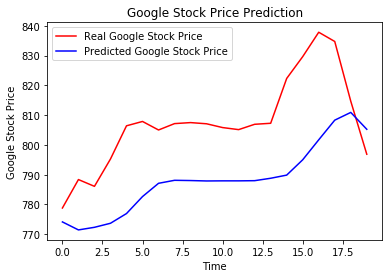

In [110]:
# Visualising the results

#dataset_test -> real_stock_price -> (20, 1)
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price') 
## predicted_stock_price = regressor.predict(X_test)#(20, 60, 1) -> (20, 1)
#predicted_stock_price -> (20, 1)
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()